In [1]:
import pandas as pd
import sys
print(pd.__version__)

0.20.2


In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import gzip

In [4]:
housing = pd.read_csv("data.csv")

In [5]:
housing.shape

(3219, 17)

In [6]:
housing.head(5)

,P001001,P006001,P006002,P006003,P006005,P006008,P007010,H011001,H011004,H011006,H011009,P148B009,P148D017,NAME,state,county,Unnamed: 16
0,43671,43671,34960,7481,265,525,394,16003,1927,27,134,32,0,Autauga County,1,1,NaN
1,140415,140415,122349,14233,535,1712,2341,55336,3367,81,418,60,38,Baldwin County,1,3,NaN
2,29038,29038,14909,13487,30,219,509,10409,2837,0,30,9,0,Barbour County,1,5,NaN
3,20826,20826,15928,4632,12,119,181,7421,941,8,29,2,0,Bibb County,1,7,NaN
4,51024,51024,48098,563,114,552,2629,19265,131,38,128,0,7,Blount County,1,9,NaN


In [7]:
housing_edit = housing[['P001001', 'P006001', 'P006002', 'P006003', 'P006005', 'P006008', 'P007010', 'H011001', 'H011004', 'H011006', 'H011009', 'P148B009', 'P148D017']]
# Perform mean normalization and feature scaling
scaler = preprocessing.StandardScaler()
    

In [8]:
scaled_housing = scaler.fit_transform(housing_edit)

In [9]:
cov_mat = np.cov(scaled_housing.T)

In [10]:
cov_mat.shape

(13, 13)

In [11]:
U, s, V = np.linalg.svd(cov_mat, full_matrices=True)

In [12]:
U.shape


(13, 13)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components = 2)

In [15]:
pca_result = pca.fit(scaled_housing).fit_transform(scaled_housing)

In [16]:
print(pca.explained_variance_ratio_)

[ 0.81468756  0.1095751 ]


In [17]:
print(pca.singular_values_) 

[ 184.64081424   67.7155014 ]


In [18]:
scaled_housing.shape

(3219, 13)

In [19]:
from matplotlib import pyplot as plt

In [20]:
pca_result.shape

(3219, 2)

In [21]:
pca_result

array([[-0.44218813, -0.06203748],
       [ 0.20733901, -0.25458568],
       [-0.50859118, -0.16592579],
       ..., 
       [-0.41129382,  0.24111816],
       [-0.18449791,  0.27225704],
       [-0.31504022,  0.19668723]])

In [22]:
pca_result[0, :]

array([-0.44218813, -0.06203748])

In [23]:
pca_result_copy = pca_result

In [24]:
counter = 3219

In [25]:
new_row = np.array([range(0, counter)])
new_col = np.transpose(new_row)

In [26]:
pca_result.shape

(3219, 2)

In [27]:
all_data = np.append(pca_result, new_col, 1)

In [28]:
new_col.shape

(3219, 1)

In [29]:
all_data.shape

(3219, 3)

In [30]:
pca_result_append = all_data

In [31]:
sorted(pca_result_append,key=lambda x: x[0], reverse = True)

[array([ 114.98457184,   25.45086448,  202.        ]),
 array([  58.13802457,  -22.26950737,  607.        ]),
 array([   35.63833914,    -7.69677591,  2620.        ]),
 array([   32.24349204,     2.62790336,  1865.        ]),
 array([  30.19989129,   13.26132587,  213.        ]),
 array([   27.97070074,   -11.83643468,  1848.        ]),
 array([  27.85860868,    6.30098174,  220.        ]),
 array([  26.19234134,   15.91375654,  226.        ]),
 array([  24.30851653,   -6.03097294,  359.        ]),
 array([  23.80887457,    0.6727087 ,  101.        ]),
 array([   23.13513159,   -19.82177475,  1309.        ]),
 array([  22.8551788,   18.058682 ,  544.       ]),
 array([  22.14155878,    6.24433761,  184.        ]),
 array([   21.6799726,    -6.9120746,  2576.       ]),
 array([   18.30101437,   -14.64834425,  2291.        ]),
 array([   18.11922213,     4.45385769,  2968.        ]),
 array([  1.74925564e+01,  -5.19947617e-01,   1.85500000e+03]),
 array([  16.76962073,    1.69216115,  21

In [32]:
housing.iloc[202].NAME

'Los Angeles County'

In [33]:
housing.iloc[607].NAME


'Cook County'

In [34]:
housing.iloc[2620].NAME


'Harris County'

In [35]:
housing.iloc[1865].NAME


'Queens County'

In [36]:
housing.iloc[213].NAME

'Orange County'

In [37]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -3.01631443e-01  -4.60434258e-02  -2.46406948e-01   1.13113574e-01
    2.65154689e-02   6.87118523e-02  -1.12119851e-01   9.14109095e-02
   -1.72178390e-02   7.07106781e-01   5.86711849e-02   5.40004932e-01
   -1.08130096e-01]
 [ -3.01631443e-01  -4.60434258e-02  -2.46406948e-01   1.13113574e-01
    2.65154689e-02   6.87118523e-02  -1.12119851e-01   9.14109095e-02
   -1.72178390e-02  -7.07106781e-01   5.86711849e-02   5.40004932e-01
   -1.08130096e-01]
 [ -2.82063634e-01  -6.09402513e-02  -4.84317468e-01   3.93564959e-01
   -1.83936274e-02   2.39885349e-02   1.39157936e-01   1.07643163e-01
    1.54691719e-01   1.76639463e-13  -1.54755534e-01  -5.20151451e-01
   -4.20675069e-01]
 [ -2.45591404e-01  -4.72610297e-01   2.18186929e-01  -1.42850023e-01
   -7.04247307e-02   1.09270486e-01  -5.40069218e-01  -3.27435547e-01
    4.05539834e-01   1.51354351e-14  -2.38341087e-01  -8.81431423e-02
   -5.90421981e-02]
 [ -2.73566272e-01   3.23301196e-01   3.20960087e-01   5.46360536e

In [38]:
# Reference 
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
10.5942294231
1.42491893396
0.473947528453
0.251961350794
0.123054523433
0.0663546606996
0.0355649881491
0.0196579896386
0.00752471370087
0.00362753192911
0.00195719938326
0.00124093299888
1.74760902232e-16


In [39]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1),
                      eig_pairs[1][1].reshape(13,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.30163144 -0.04604343]
 [-0.30163144 -0.04604343]
 [-0.28206363 -0.06094025]
 [-0.2455914  -0.4726103 ]
 [-0.27356627  0.3233012 ]
 [-0.29397696  0.1837549 ]
 [-0.27017892  0.17475889]
 [-0.29866421 -0.08322404]
 [-0.23200103 -0.50788656]
 [-0.2665893   0.3534942 ]
 [-0.29352052  0.15294084]
 [-0.26256513 -0.35373202]
 [-0.27334029  0.24800244]]


In [40]:
Y = scaled_housing.dot(matrix_w)
Y.shape


(3219, 2)

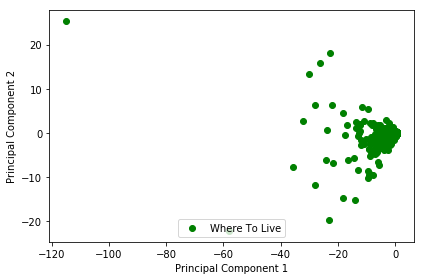

In [41]:
plt.figure(figsize=(6, 4))
#plt.ylim([-0.27,-0.24])
plt.scatter(Y[:,0],Y[:,1],c='green', label = 'Where To Live')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [42]:
Y.shape


(3219, 2)

In [43]:
Y_new = np.append(Y, new_col, 1)

In [44]:
Y_new.shape

(3219, 3)

In [45]:
sorted(Y_new,key=lambda x: x[0])

[array([-114.98457184,   25.45086448,  202.        ]),
 array([ -58.13802457,  -22.26950737,  607.        ]),
 array([  -35.63833914,    -7.69677591,  2620.        ]),
 array([  -32.24349204,     2.62790336,  1865.        ]),
 array([ -30.19989129,   13.26132587,  213.        ]),
 array([  -27.97070074,   -11.83643468,  1848.        ]),
 array([ -27.85860868,    6.30098174,  220.        ]),
 array([ -26.19234134,   15.91375654,  226.        ]),
 array([ -24.30851653,   -6.03097294,  359.        ]),
 array([ -23.80887457,    0.6727087 ,  101.        ]),
 array([  -23.13513159,   -19.82177475,  1309.        ]),
 array([ -22.8551788,   18.058682 ,  544.       ]),
 array([ -22.14155878,    6.24433761,  184.        ]),
 array([  -21.6799726,    -6.9120746,  2576.       ]),
 array([  -18.30101437,   -14.64834425,  2291.        ]),
 array([  -18.11922213,     4.45385769,  2968.        ]),
 array([ -1.74925564e+01,  -5.19947617e-01,   1.85500000e+03]),
 array([ -16.76962073,    1.69216115,  21